# Desarrollo del algoritmo de k-means y del dataset

## Librerias

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset para probar el algoritmo

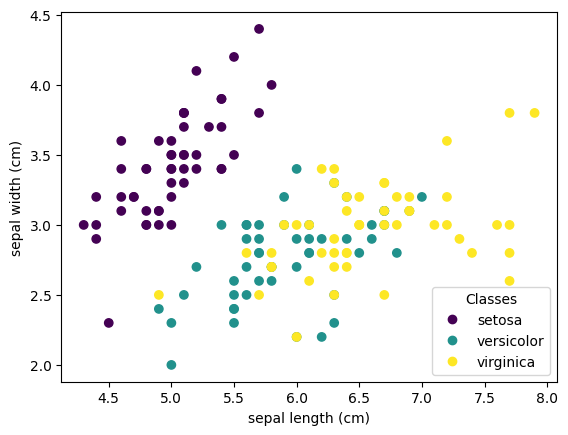

In [3]:
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


## Normalización

In [4]:
def normalize_per_col(array):
    arr_min = array.min(axis=0)
    arr_max = array.max(axis=0)
    return (array - arr_min) / (arr_max - arr_min)

In [5]:
iris.data = normalize_per_col(iris.data)

## Desarrollo de K-Means

In [126]:
def obtain_means(array, ran_means):
    means = []
    for i in range(len(array)):
        for j in range(len(array[i])):
            if np.isnan(np.array(array[i], dtype=np.float64)).any():
                array[i][j] = ran_means[i]
        
    for i in range(len(array)):
        mean = np.mean(array[i], 0)
        means.append(mean)
        
    return means

In [127]:
def step(dataset, ran_means):
    k_means = len(ran_means)
    no_features = len(ran_means[0])
    classified_samples = [[] for i in range(k_means)]

    for i in range(len(dataset)):
        distances = []
        for j in range(k_means):
            distance = 0
            for k in range(no_features):
                distance += (ran_means[j][k] - dataset[i][k])**2
            distances.append(distance)
        if np.argmin == 0:
            print(dataset[i])
        classified_samples[np.argmin(distances)].append(dataset[i])

    return obtain_means(classified_samples, ran_means)

## Testeo de K-Means

[[0.062 0.014]
 [0.027 0.638]
 [0.408 0.839]]
[array([0.38253968, 0.21666667]), array([0.17806268, 0.51816239]), array([0.57858187, 0.50383772])]
[array([0.38690476, 0.24404762]), array([0.19270833, 0.59288194]), array([0.64675926, 0.45625   ])]
[array([0.38647343, 0.26086957]), array([0.19897959, 0.60459184]), array([0.66868687, 0.44469697])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0.60459184]), array([0.67557652, 0.44654088])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0.60459184]), array([0.67557652, 0.44654088])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0.60459184]), array([0.67557652, 0.44654088])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0.60459184]), array([0.67557652, 0.44654088])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0.60459184]), array([0.67557652, 0.44654088])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0.60459184]), array([0.67557652, 0.44654088])]
[array([0.390625  , 0.26649306]), array([0.19897959, 0

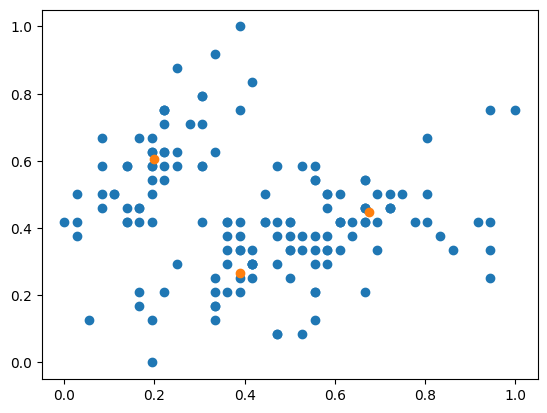

In [116]:
k_means = 3
no_features = 2

dataset = iris.data[:,:2]
means = np.random.randint(0, 1000, size=(k_means, no_features))/1000

print(means)

for _ in range(10):
    means = step(dataset, means)
    print(means)

means = np.array(means)
print(means)

dataset = np.array(dataset)
fig = plt.figure()
plt.scatter(dataset[:,0],dataset[:,1])
plt.scatter(means[:,0],means[:,1])

## Desarrollo del dataset del proyecto

In [9]:
tickers = [
    # 🔴 Cripto y acciones muy volátiles (riesgo alto)
    "BTC-USD", "ETH-USD", "DOGE-USD", "SOL-USD", "ADA-USD", "COIN", "MARA", "RIOT", "HIVE", "HUDI",
    "SPCE", "GME", "AMC", "UPST", "AFRM", "SOFI", "LCID", "RIVN", "NKLA", "BBBY",

    # 🟠 Acciones de crecimiento / alto riesgo (tech emergente, AI, biotech)
    "PLTR", "SNOW", "DDOG", "CRWD", "ZS", "NET", "FSLY", "U", "DOCN", "ZI",
    "AI", "PATH", "NVTA", "BEAM", "CRSP", "EDIT", "VERV", "BFLY", "BIRD", "BIGC",

    # 🟡 Mid caps / riesgo medio (con más estabilidad)
    "TSLA", "RBLX", "ABNB", "SQ", "PYPL", "SHOP", "TWLO", "ROKU", "W", "TOST",
    "ALGN", "FVRR", "ETSY", "BIDU", "IQ", "YNDX", "NTLA", "PACB", "NVCR", "SDGR",

    # 🔵 Blue Chips / bajo riesgo
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "JPM", "V", "MA", "JNJ",
    "PG", "KO", "PEP", "UNH", "MCD", "HD", "LOW", "WMT", "COST", "INTC",

    # 🟢 ETFs de índices (riesgo bajo a medio)
    "SPY", "VOO", "QQQ", "VTI", "DIA", "IWM", "VEA", "VWO", "EFA", "VT",
    "IVV", "IJH", "IJR", "XLF", "XLV", "XLE", "XLI", "XLY", "XLK", "XLU",

    # 🟢 ETFs de bonos y renta fija (muy conservadores)
    "BND", "AGG", "TLT", "IEF", "SHY", "VGIT", "GOVT", "MBB", "TIP", "VMBS",
    "LQD", "HYG", "VCSH", "VCIT", "VCLT", "BSV", "BIV", "BNDX", "IGSB", "GOVZ",

    # 🟢 Bonos y futuros (aún más conservadores)
    "ZC=F", "ZN=F", "ZB=F", "UB=F", "FV=F", "VMEX.MX", "ISHG", "SPSB", "SPTL", "SPAB",

    # 🟠 Finanzas y bancos
    "BAC", "WFC", "C", "GS", "MS", "USB", "TFC", "PNC", "BK", "SCHW",
    "AXP", "BLK", "TROW", "AIG", "ALL", "MET", "PRU", "CME", "ICE", "NDAQ",

    # 🟡 Energía y petróleo
    "XOM", "CVX", "COP", "EOG", "PSX", "MPC", "VLO", "HES", "SLB", "HAL",
    "OXY", "DVN", "FANG", "PXD", "BKR", "KMI", "WMB", "ENB", "TRP", "ET",

    # 🟢 Consumo básico / defensivo
    "MO", "PM", "CL", "KMB", "GIS", "HSY", "SJM", "CAG", "HRL", "CPB",
    "TSN", "KHC", "MDLZ", "KR", "WBA", "EL", "CHD", "PG", "DGE.L", "NESN.SW",

    # 🟠 Real estate y REITs
    "VNQ", "O", "SPG", "PLD", "AMT", "CCI", "DLR", "EQIX", "WELL", "AVB",
    "MAA", "EQR", "ESS", "UDR", "VTR", "HST", "PEAK", "ARE", "FRT", "BXP"
]

len(tickers)

210

In [10]:
import yfinance as yf

# Descargar precios de cierre (Close) del último año
data = yf.download(tickers, start="2023-06-01", end="2024-06-01")["Close"]

# Guardar como CSV
data.to_csv("precios_cierre.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  209 of 209 completed

9 Failed downloads:
['NKLA']: HTTPError('HTTP Error 404: ')
['PEAK', 'VMEX.MX', 'BBBY', 'NVTA', 'SQ', 'YNDX', 'PXD']: YFTzMissingError('possibly delisted; no timezone found')
['FV=F']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-06-01 -> 2024-06-01)')


In [11]:
import pandas as pd
df = pd.read_csv("precios_cierre.csv")
df_clean = df.ffill()
df_clean

,Date,AAPL,ABNB,ADA-USD,AFRM,AGG,AI,AIG,ALGN,ALL,...,XLU,XLV,XLY,XOM,YNDX,ZB=F,ZC=F,ZI,ZN=F,ZS
0,2023-06-01,178.304779,112.160004,0.364724,14.580000,91.699127,34.720001,51.167534,297.200012,104.348434,...,60.049984,123.990250,150.554153,96.480003,NaN,128.59375,592.50,25.910000,113.921875,135.089996
1,2023-06-02,179.156219,118.059998,0.378304,15.700000,91.215530,32.259998,52.557644,302.000000,105.189339,...,60.674255,125.580246,154.087418,98.720238,NaN,127.68750,609.00,26.450001,113.046875,142.389999
2,2023-06-03,179.156219,118.059998,0.376028,15.700000,91.215530,32.259998,52.557644,302.000000,105.189339,...,60.674255,125.580246,154.087418,98.720238,NaN,127.68750,609.00,26.450001,113.046875,142.389999
3,2023-06-04,179.156219,118.059998,0.377693,15.700000,91.215530,32.259998,52.557644,302.000000,105.189339,...,60.674255,125.580246,154.087418,98.720238,NaN,127.68750,609.00,26.450001,113.046875,142.389999
4,2023-06-05,177.799789,115.690002,0.352015,15.550000,91.206261,35.320000,51.634075,305.149994,104.615997,...,60.963089,126.033150,154.548676,98.281540,NaN,127.68750,597.50,26.549999,113.109375,148.050003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-05-27,189.095657,144.470001,0.467963,30.030001,92.680473,24.040001,75.990540,255.619995,160.813614,...,68.901031,141.450653,173.623764,109.598381,NaN,116.81250,464.75,12.950000,108.703125,171.639999
362,2024-05-28,189.105606,147.009995,0.456990,29.639999,92.248642,24.100000,75.338051,253.770004,160.647766,...,68.833580,139.736633,173.198471,110.989861,NaN,115.78125,462.50,12.840000,108.296875,164.160004
363,2024-05-29,189.404221,146.610001,0.450995,28.719999,91.893608,23.920000,75.542564,252.759995,159.506332,...,67.947021,138.649445,172.061035,109.801308,NaN,114.56250,455.25,12.630000,107.765625,164.369995
364,2024-05-30,190.399567,145.520004,0.446581,29.360001,92.325417,28.570000,76.204788,256.500000,160.950180,...,68.862480,138.718018,173.079773,110.149170,NaN,115.43750,448.75,12.500000,108.234375,156.649994


In [12]:
def sharpe_ratio(timeseries):
    returns = np.diff(timeseries) / timeseries[:-1]  # Daily returns
    average_return = np.mean(returns)
    std_return = np.std(returns)

    if std_return == 0:
        return 0  # Para evitar división entre 0

    sharpe = average_return / std_return
    return sharpe

In [13]:
def cagr(timeseries):
    n = timeseries.size
    return (timeseries[n-1] / timeseries[0])**(1/n) - 1

In [14]:
def calc_sharpe_cagr(dataframe):
    result = []
    sharpe_ratios = []
    cagrs = []
    for i in range(1, dataframe.columns.size):
        column = dataframe.iloc[:, i]
        sharpe_ratios.append(sharpe_ratio(column))
        cagrs.append(cagr(column))
    result.append(dataframe.columns[1:])
    result.append(sharpe_ratios)
    result.append(cagrs)
    return np.array(result).T
    

In [15]:
sharpe_cagr_df = pd.DataFrame(calc_sharpe_cagr(df_clean), columns=["Ticker", "Sharpe", "CAGR"])
sharpe_cagr_df.to_csv("sharpe_cagr.csv")
sharpe_cagr_df

,Ticker,Sharpe,CAGR
0,AAPL,0.023618,0.000193
1,ABNB,0.048256,0.000701
2,ADA-USD,0.033421,0.000559
3,AFRM,0.064563,0.001906
4,AGG,0.009586,0.000027
...,...,...,...
204,ZB=F,-0.03982,-0.000283
205,ZC=F,-0.039285,-0.000774
206,ZI,-0.050669,-0.002038
207,ZN=F,-0.035998,-0.000134


In [16]:
values = sharpe_cagr_df.iloc[:, 1:3]

In [20]:

normalized_values = normalize_per_col(values)
normalized_values.shape[0]


209

## Testeo en el verdadero dataset

[array([0., 0.]), array([np.float64(0.13775019302420008), np.float64(0.0)], dtype=object), array([np.float64(0.12868897566251994), np.float64(0.2844366641253786)],
      dtype=object), array([np.float64(0.20968956911963557), np.float64(0.4173887183665368)],
      dtype=object), array([np.float64(0.31734775939588183), np.float64(0.49908487233973364)],
      dtype=object), array([np.float64(0.4498471279175862), np.float64(0.5372753107733513)],
      dtype=object), array([np.float64(0.6199914587682509), np.float64(0.5724212184192656)],
      dtype=object), array([np.float64(0.7908532965393675), np.float64(0.6153684641213263)],
      dtype=object), array([np.float64(0.9073750176825279), np.float64(0.6751553252732327)],
      dtype=object), array([np.float64(0.9796181448777114), np.float64(1.0)], dtype=object)]
[array([0., 0.]), array([np.float64(0.13775019302420008), np.float64(0.0)], dtype=object), array([np.float64(0.1528386741471204), np.float64(0.2993440412949484)],
      dtype=object)

Text(0, 0.5, 'CAGR')

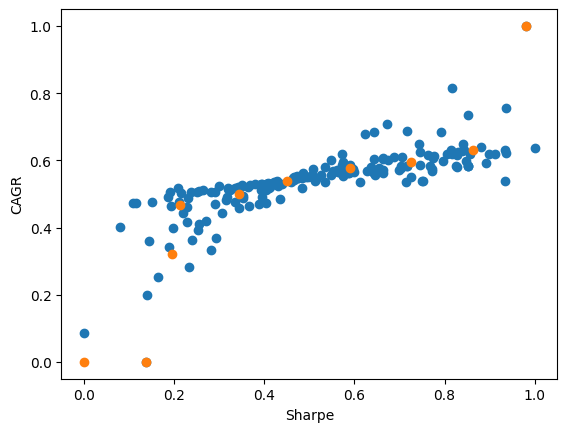

In [128]:
means = (np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10]])-1)/10

for _ in range(10):
    means = step(normalized_values.values, means)
    print(means)

means = np.array(means)

plt.scatter(normalized_values['Sharpe'], normalized_values["CAGR"])
plt.scatter(means[:,0],means[:,1])
plt.xlabel("Sharpe")
plt.ylabel("CAGR")